In [ ]:
import pandas as pd

In [ ]:
train = pd.read_excel('text_emotion.xlsx', sheet_name='text_emotion')
test = pd.read_excel('CSCA08_Fall_2016.xlsx', sheet_name='Sheet')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [ ]:
model.fit([str(t) for t in train['content']], train['sentiment'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
labels = model.predict([str(t) for t in test['content']])

In [ ]:
test['sentiment'] = labels

In [ ]:
test.to_excel("posts_with_sentiment_nb.xlsx")

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Sentiment Distribution')

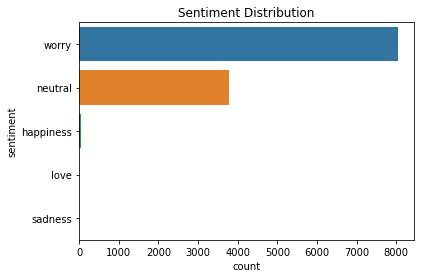

In [ ]:
sns.countplot(data = test, y = 'sentiment').set_title("Sentiment Distribution")

In [26]:
def get_stress(sentiment):
  return 'stressed' if sentiment == 'worry' or sentiment == 'sadness' else 'not stressed'

In [29]:
print(test['sentiment'][10])
get_stress(test['sentiment'][10])

worry


'stressed'

In [30]:
test['stress_level'] = test['sentiment'].apply(get_stress)

In [50]:
import datetime

In [59]:
date = test['datetime'].iloc[-1].split('T')[0].split('-')
start_week = datetime.datetime(int(date[0]), int(date[1]), int(date[2])).isocalendar()[1]

def get_week(date):
  date = date.split('T')[0].split('-')
  return datetime.datetime(int(date[0]), int(date[1]), int(date[2])).isocalendar()[1] - start_week + 1

In [60]:
test['week'] = test['datetime'].apply(get_week)
test

,title,content,type,name,datetime,thread_id,views,directory,sentiment,stress_level,week
0,Assignment 2 Special Re-Mark Request,Assignment 2 Special Re-Mark RequestA lot of p...,post,Brian Harrington,2016-12-13T15:49:11.000Z,@2698,486,assignment_2,worry,stressed,16
1,Assignment 2 Special Re-Mark Request,Can we also add a line? or just replace,followup,Dharmik Shah,2016-12-13T15:05:16.000Z,@2698_f1,486,assignment_2,neutral,not stressed,16
2,Assignment 2 Special Re-Mark Request,Yes. If you want to insert a line after the 40...,sub_followup,Brian Harrington,2016-12-13T15:47:57.000Z,@2698_f1,486,assignment_2,neutral,not stressed,16
3,Assignment 2 Special Re-Mark Request,Okay and if im in a function (so code is inden...,sub_followup,Dharmik Shah (Anon. Poet to classmates),2016-12-13T15:56:52.000Z,@2698_f1,486,assignment_2,worry,stressed,16
4,Assignment 2 Special Re-Mark Request,"That looks right, just make sure you're using ...",sub_followup,Brian Harrington,2016-12-13T18:40:59.000Z,@2698_f1,486,assignment_2,neutral,not stressed,16
...,...,...,...,...,...,...,...,...,...,...,...
11871,Welcome to CSCA08,Welcome to CSCA08Glad to see you've found Piaz...,post,Brian Harrington,2016-09-01T01:41:08.000Z,@6,346,other,worry,stressed,1
11872,Get familiar with Piazza,Get familiar with PiazzaPiazza FeaturesClick t...,post,Piazza Team,2016-09-01T01:38:41.000Z,@3,17,NaN,neutral,not stressed,1
11873,Introduce Piazza to your students,Introduce Piazza to your studentsPost a Welcom...,post,Piazza Team,2016-09-01T01:38:41.000Z,@4,20,NaN,neutral,not stressed,1
11874,Welcome to Piazza!,Welcome to Piazza!Piazza is a Q&A platform des...,post,Piazza Team,2016-09-01T01:38:40.000Z,@1,287,NaN,neutral,not stressed,1


In [74]:
stress_level = [test[test['week'] == i]['stress_level'].value_counts() for i in range(1, 12)]
stress_level

[not stressed    13
 stressed        12
 Name: stress_level, dtype: int64, stressed        73
 not stressed    44
 Name: stress_level, dtype: int64, stressed        143
 not stressed     78
 Name: stress_level, dtype: int64, stressed        281
 not stressed    122
 Name: stress_level, dtype: int64, stressed        529
 not stressed    235
 Name: stress_level, dtype: int64, stressed        480
 not stressed    233
 Name: stress_level, dtype: int64, stressed        303
 not stressed    110
 Name: stress_level, dtype: int64, stressed        242
 not stressed     98
 Name: stress_level, dtype: int64, stressed        393
 not stressed    188
 Name: stress_level, dtype: int64, stressed        327
 not stressed    139
 Name: stress_level, dtype: int64, stressed        988
 not stressed    542
 Name: stress_level, dtype: int64]

Text(0, 0.5, 'number of posts')

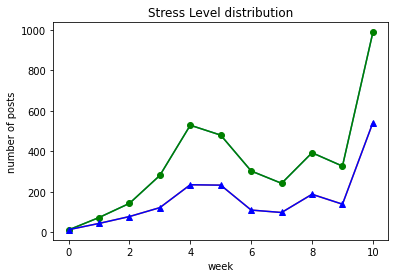

In [85]:
import numpy as np
import matplotlib.pyplot as plt
stressed = [i.stressed for i in stress_level]
not_stressed = [i['not stressed'] for i in stress_level]
week = range(len(stressed))
l1 = plt.plot(week, stressed, label='stressed')
l2 = plt.plot(week, not_stressed, label='not stressed')
plt.plot(week, stressed, 'go-', week, not_stressed, 'b^-')
plt.title('Stress Level distribution')
plt.xlabel('week')
plt.ylabel('number of posts')


Text(0, 0.5, 'PSST')

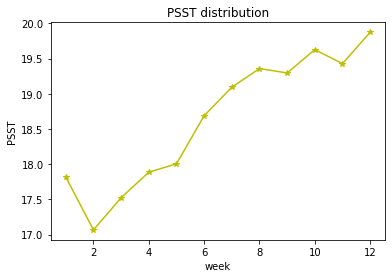

In [107]:
PSST = [17.8165137614679, 17.0652173913043, 17.523178807947, 17.8855721393035, 18.0049504950495, 18.688679245283, 19.093137254902, 19.3589743589744, 19.2964824120603, 19.627027027027, 19.4292929292929, 19.875]
week = range(1,13)
plt.plot(week, PSST, 'y*-')
plt.title('PSST distribution')
plt.xlabel('week')
plt.ylabel('PSST')